<a href="https://colab.research.google.com/github/FernandoCerriteno/Portafolio-de-analisis/blob/main/Estad%C3%ADstica%20avanzada/Modelo_OLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm, uniform, skewnorm

In [ ]:
df = pd.read_csv('/content/CO2 Emissions_Canada.csv')

In [ ]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [ ]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [ ]:
y = df.iloc[:,11]
x = df.iloc[:,3]#[:,0:10]

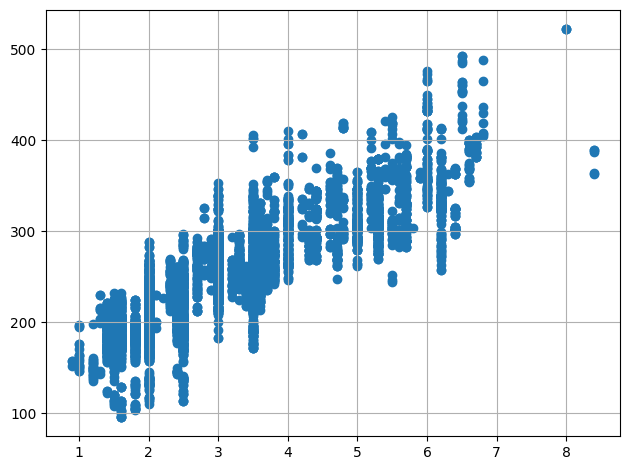

In [ ]:
plt.scatter(x,y)
plt.grid(True)
plt.tight_layout()

In [ ]:
X = sm.add_constant(x)

In [ ]:
print(X)

      const  Engine Size(L)
0       1.0             2.0
1       1.0             2.4
2       1.0             1.5
3       1.0             3.5
4       1.0             3.5
...     ...             ...
7380    1.0             2.0
7381    1.0             2.0
7382    1.0             2.0
7383    1.0             2.0
7384    1.0             2.0

[7385 rows x 2 columns]


In [ ]:
model = sm.OLS(y,X)
result = model.fit()
print(result.params)

const             134.365893
Engine Size(L)     36.777315
dtype: float64


In [ ]:
print('r^2 =',result.rsquared)

r^2 = 0.7244472046524082


In [ ]:
df.head(1)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196


In [ ]:
X = sm.add_constant(df['Engine Size(L)'])
model = sm.OLS(y,X)
result0 = model.fit()
print(result0.params)
print('r^2 =',result.rsquared)

const             134.365893
Engine Size(L)     36.777315
dtype: float64
r^2 = 0.6932953649936133


<h2>Gráficas de predicción

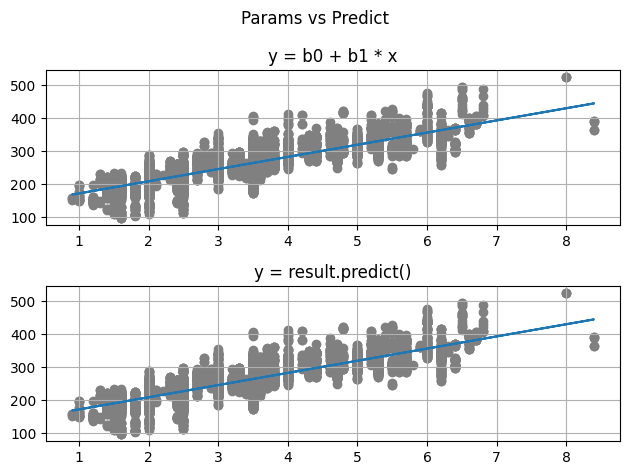

In [ ]:
fig, axs = plt.subplots(2)
fig.suptitle('Params vs Predict')
axs[0].scatter(X.iloc[:,1],y, color = 'grey')
b0,b1 = result0.params
Y = b0 + b1*X.iloc[:,1]
axs[0].plot(X.iloc[:,1],Y)
axs[0].grid(True)

axs[1].scatter(X.iloc[:,1],y, color = 'grey')
axs[1].plot(X.iloc[:,1],result0.predict())
axs[1].grid(True)

axs[0].set_title('y = b0 + b1 * x')
axs[1].set_title('y = result.predict()')

plt.tight_layout()

In [ ]:
X = sm.add_constant(df.Cylinders)
model = sm.OLS(y,X)
result1 = model.fit()
print(result1.params)
print('r^2 =',result.rsquared)

const        100.956915
Cylinders     26.647724
dtype: float64
r^2 = 0.6932953649936133


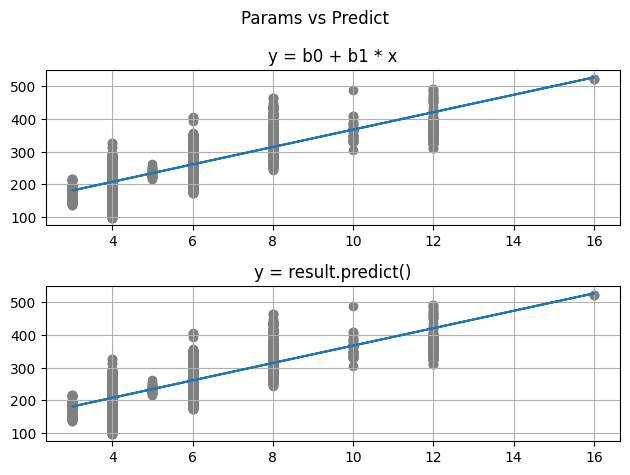

In [ ]:
fig, axs = plt.subplots(2)
fig.suptitle('Params vs Predict')
axs[0].scatter(X.iloc[:,1],y, color = 'grey')
b0,b1 = result1.params
Y = b0 + b1*X.iloc[:,1]
axs[0].plot(X.iloc[:,1],Y)
axs[0].grid(True)

axs[1].scatter(X.iloc[:,1],y, color = 'grey')
axs[1].plot(X.iloc[:,1],result1.predict())
axs[1].grid(True)

axs[0].set_title('y = b0 + b1 * x')
axs[1].set_title('y = result.predict()')

plt.tight_layout()

In [ ]:
X = sm.add_constant(df['Fuel Consumption Hwy (L/100 km)'])
model = sm.OLS(y,X)
result2 = model.fit()
print(result2.params)
print('r^2 =',result.rsquared)

const                              40.448581
Fuel Consumption Hwy (L/100 km)    23.240759
dtype: float64
r^2 = 0.6932953649936133


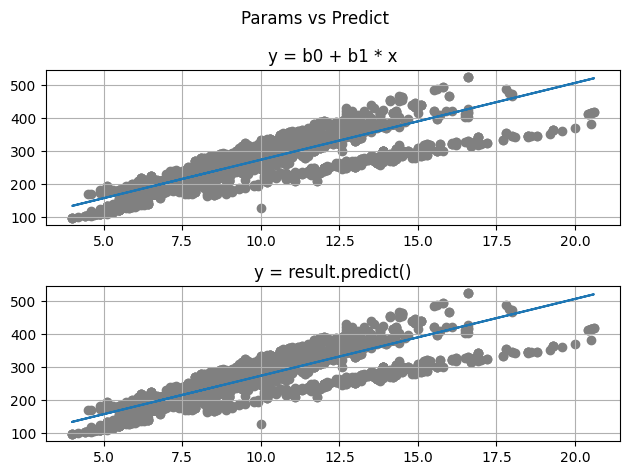

In [ ]:
fig, axs = plt.subplots(2)
fig.suptitle('Params vs Predict')
axs[0].scatter(X.iloc[:,1],y, color = 'grey')
b0,b1 = result2.params
Y = b0 + b1*X.iloc[:,1]
axs[0].plot(X.iloc[:,1],Y)
axs[0].grid(True)

axs[1].scatter(X.iloc[:,1],y, color = 'grey')
axs[1].plot(X.iloc[:,1],result2.predict())
axs[1].grid(True)

axs[0].set_title('y = b0 + b1 * x')
axs[1].set_title('y = result.predict()')

plt.tight_layout()

In [ ]:
X = sm.add_constant(df['Fuel Consumption Comb (mpg)'])
model = sm.OLS(y,X)
result3 = model.fit()
print(result3.params)
print('r^2 =',result.rsquared)

const                          452.353036
Fuel Consumption Comb (mpg)     -7.341929
dtype: float64
r^2 = 0.6932953649936133


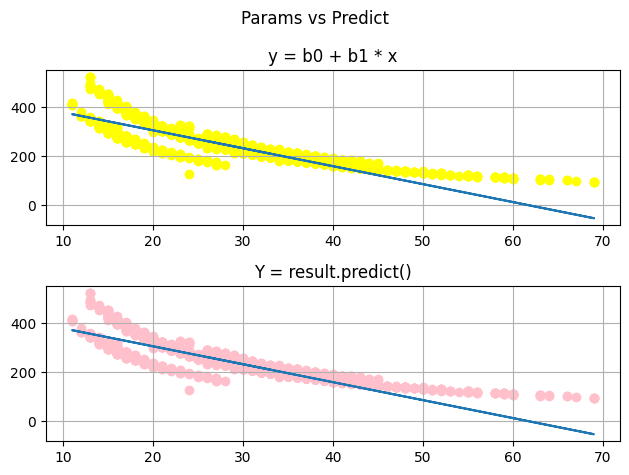

In [ ]:
fig, axs = plt.subplots(2)
fig.suptitle('Params vs Predict')
axs[0].scatter(X['Fuel Consumption Comb (mpg)'],y, color = 'yellow')
b0,b1 = result3.params
Y = b0 + b1*X['Fuel Consumption Comb (mpg)']
axs[0].plot(X['Fuel Consumption Comb (mpg)'],Y)
axs[0].grid(True)

axs[1].scatter(X['Fuel Consumption Comb (mpg)'],y, color = 'pink')
axs[1].plot(X['Fuel Consumption Comb (mpg)'],result3.predict())
axs[1].grid(True)

axs[0].set_title('y = b0 + b1 * x')
axs[1].set_title('Y = result.predict()')

plt.tight_layout()

In [ ]:
X = sm.add_constant(df['Fuel Consumption City (L/100 km)'])
model = sm.OLS(y,X)
result4 = model.fit()
print(result4.params)
print('r^2 =',result.rsquared)

const                               57.559903
Fuel Consumption City (L/100 km)    15.372459
dtype: float64
r^2 = 0.6932953649936133


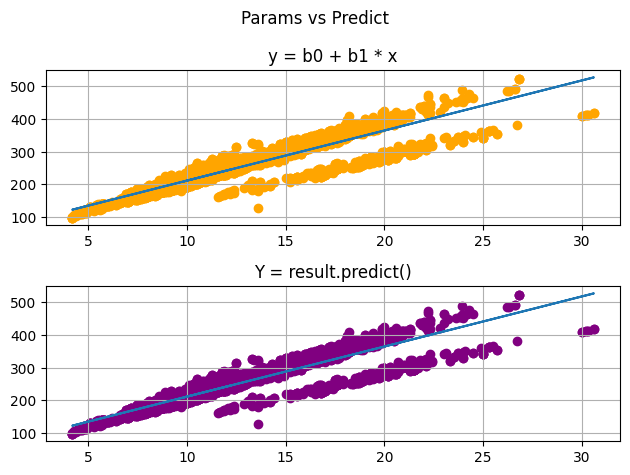

In [ ]:
fig, axs = plt.subplots(2)
fig.suptitle('Params vs Predict')
axs[0].scatter(X['Fuel Consumption City (L/100 km)'],y, color = 'orange')
b0,b1 = result4.params
Y = b0 + b1*X['Fuel Consumption City (L/100 km)']
axs[0].plot(X['Fuel Consumption City (L/100 km)'],Y)
axs[0].grid(True)

axs[1].scatter(X['Fuel Consumption City (L/100 km)'],y, color = 'purple')
axs[1].plot(X['Fuel Consumption City (L/100 km)'],result4.predict())
axs[1].grid(True)

axs[0].set_title('y = b0 + b1 * x')
axs[1].set_title('Y = result.predict()')

plt.tight_layout()

In [ ]:
X = sm.add_constant(df['Fuel Consumption Comb (L/100 km)'])
model = sm.OLS(y,X)
result5 = model.fit()
print(result5.params)
print('r^2 =',result.rsquared)

const                               46.763152
Fuel Consumption Comb (L/100 km)    18.571319
dtype: float64
r^2 = 0.6932953649936133


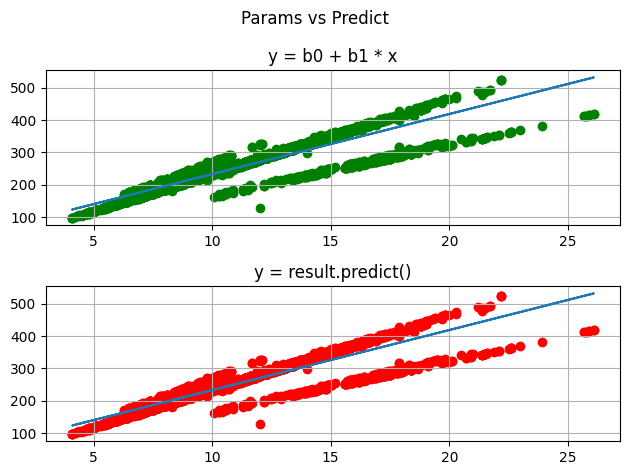

In [ ]:
fig, axs = plt.subplots(2)
fig.suptitle('Params vs Predict')
axs[0].scatter(X.iloc[:,1],y, color = 'green')
b0,b1 = result5.params
Y = b0 + b1*X.iloc[:,1]
axs[0].plot(X.iloc[:,1],Y)
axs[0].grid(True)

axs[1].scatter(X.iloc[:,1],y, color = 'red')
axs[1].plot(X.iloc[:,1],result5.predict())
axs[1].grid(True)

axs[0].set_title('y = b0 + b1 * x')
axs[1].set_title('y = result.predict()')

plt.tight_layout()

Analizando los diferentes valores obtenidos se pueden determinar que los valores más importantes son los consumos de combustible en ciudad, y ambas de comb

Analizando las gráficas obtenidas se puede determinar que entre las gráficas de consumo en ciudad y consumo combinado por litro son bastante similares, esto se refleja en el r^2 obtenida de cada uno los cuales son casi identicos.

<h2>Residuos estandarizados  y QQ plots

Distribution graph


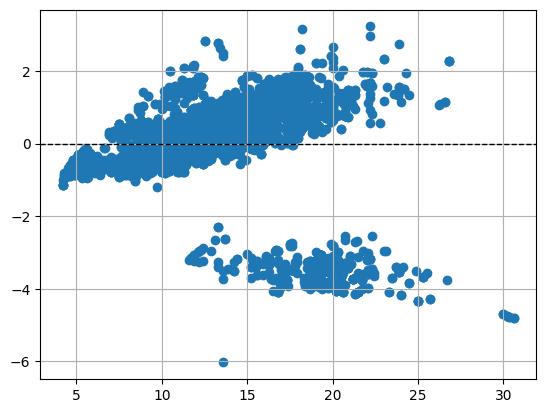



QQ Graph - normal distribution


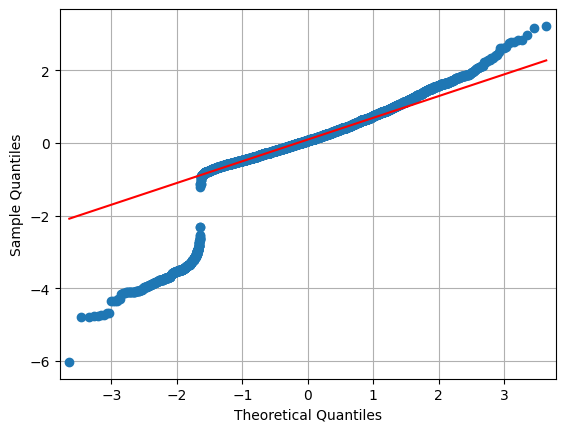

In [ ]:
X = sm.add_constant(df['Fuel Consumption City (L/100 km)'])
model = sm.OLS(y,X)
result = model.fit()

influence = result.get_influence()
standarized_residuals = influence.resid_studentized_internal

plt.scatter(X.iloc[:,1],standarized_residuals)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
print('Distribution graph')
plt.grid()
plt.show()

print("\n")
fig = sm.qqplot(standarized_residuals, dist=norm, line='q')

print('QQ Graph - normal distribution')
plt.y_label=('Standarized residuals quantiles')
plt.grid()
plt.show()

QQ Graph - positive skew normal distribution


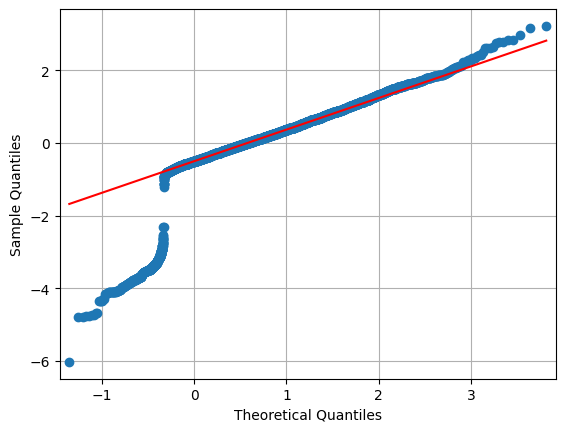

QQ Graph - positive skew normal distribution


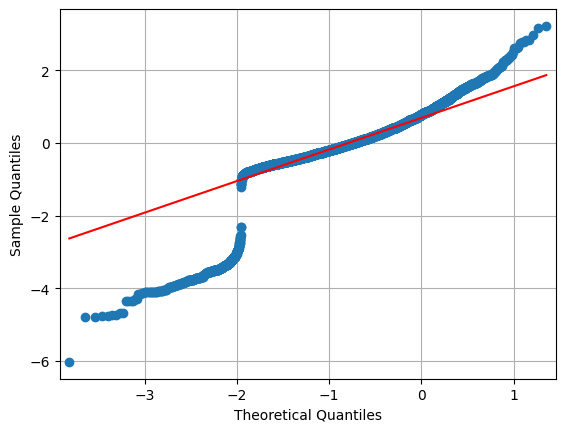

In [ ]:
fig = sm.qqplot(standarized_residuals, dist=skewnorm(2), line='q')

print('QQ Graph - positive skew normal distribution')
plt.y_label=('Standarized residuals quantiles')
plt.grid()
plt.show()

fig = sm.qqplot(standarized_residuals, dist=skewnorm(-2), line='q')

print('QQ Graph - positive skew normal distribution')
plt.y_label=('Standarized residuals quantiles')
plt.grid()
plt.show()

Distribution graph


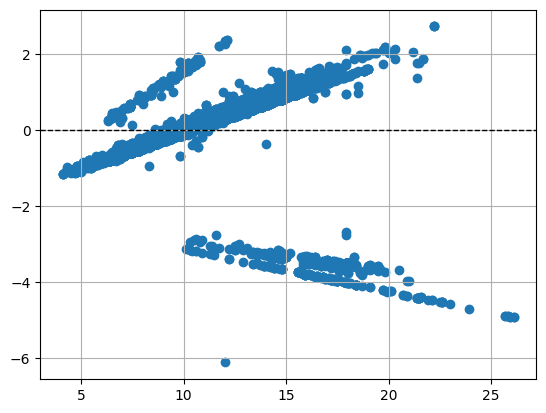



QQ Graph - normal distribution


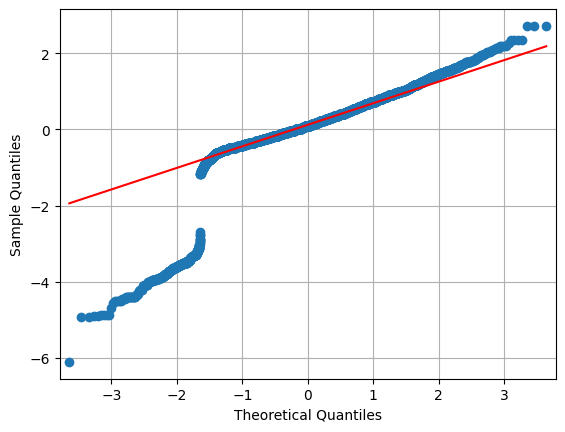

In [ ]:
X = sm.add_constant(df['Fuel Consumption Comb (L/100 km)'])
model = sm.OLS(y,X)
result = model.fit()

influence = result.get_influence()
standarized_residuals = influence.resid_studentized_internal

plt.scatter(X.iloc[:,1],standarized_residuals)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
print('Distribution graph')
plt.grid()
plt.show()

print("\n")
fig = sm.qqplot(standarized_residuals, dist=norm, line='q')

print('QQ Graph - normal distribution')
plt.y_label=('Standarized residuals quantiles')
plt.grid()
plt.show()

QQ Graph - positive skew normal distribution


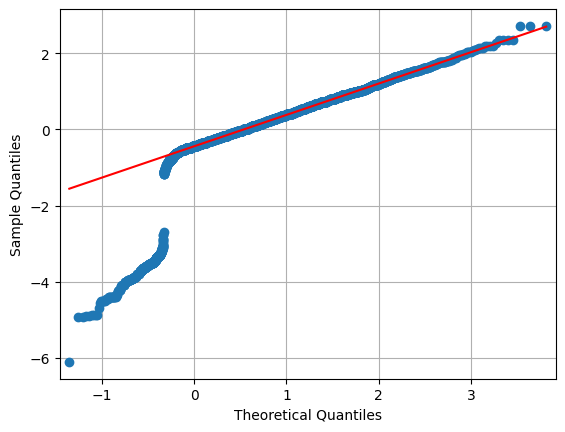

QQ Graph - positive skew normal distribution


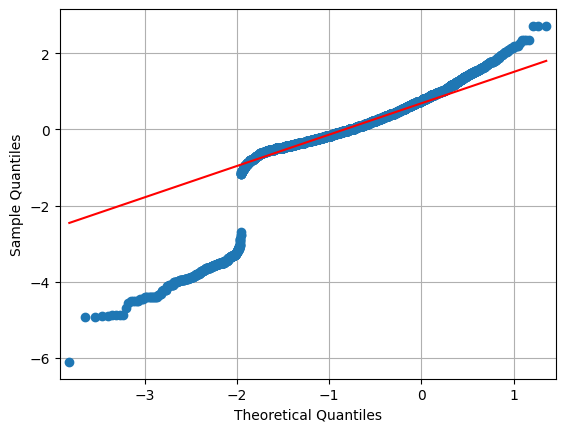

In [ ]:
fig = sm.qqplot(standarized_residuals, dist=skewnorm(2), line='q')

print('QQ Graph - positive skew normal distribution')
plt.y_label=('Standarized residuals quantiles')
plt.grid()
plt.show()

fig = sm.qqplot(standarized_residuals, dist=skewnorm(-2), line='q')

print('QQ Graph - positive skew normal distribution')
plt.y_label=('Standarized residuals quantiles')
plt.grid()
plt.show()

Distribution graph


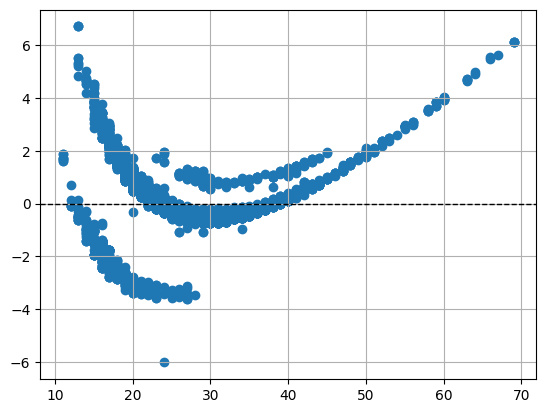



QQ Graph - normal distribution


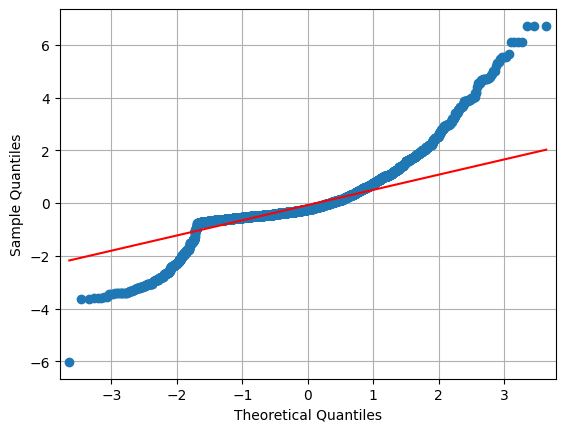

In [ ]:
X = sm.add_constant(df['Fuel Consumption Comb (mpg)'])
model = sm.OLS(y,X)
result = model.fit()

influence = result.get_influence()
standarized_residuals = influence.resid_studentized_internal

plt.scatter(X.iloc[:,1],standarized_residuals)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
print('Distribution graph')
plt.grid()
plt.show()

print("\n")
fig = sm.qqplot(standarized_residuals, dist=norm, line='q')

print('QQ Graph - normal distribution')
plt.y_label=('Standarized residuals quantiles')
plt.grid()
plt.show()

QQ Graph - positive skew normal distribution


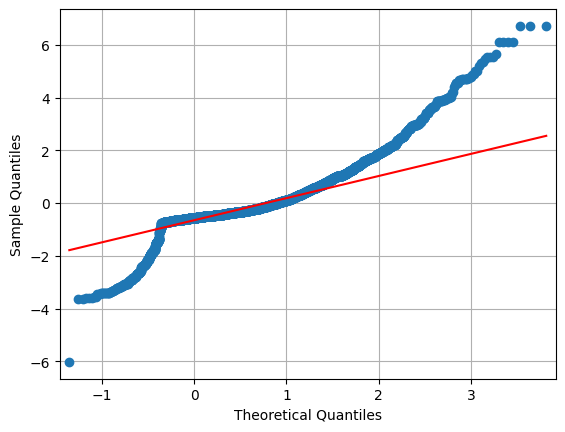

QQ Graph - positive skew normal distribution


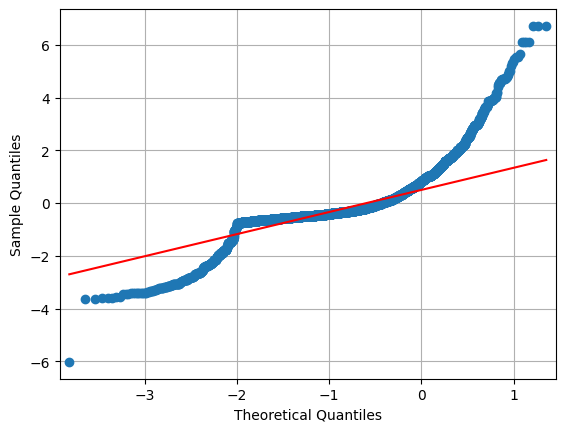

In [ ]:
fig = sm.qqplot(standarized_residuals, dist=skewnorm(2), line='q')

print('QQ Graph - positive skew normal distribution')
plt.y_label=('Standarized residuals quantiles')
plt.grid()
plt.show()

fig = sm.qqplot(standarized_residuals, dist=skewnorm(-2), line='q')

print('QQ Graph - positive skew normal distribution')
plt.y_label=('Standarized residuals quantiles')
plt.grid()
plt.show()

Distribution graph


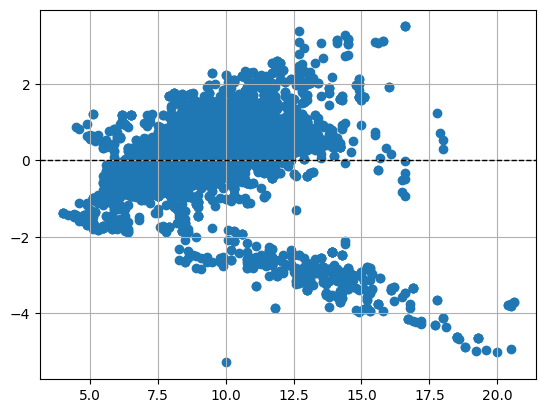



QQ Graph - normal distribution


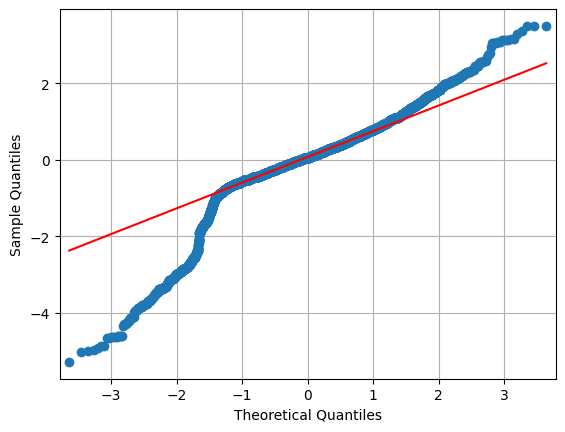

In [ ]:
X = sm.add_constant(df['Fuel Consumption Hwy (L/100 km)'])
model = sm.OLS(y,X)
result = model.fit()

influence = result.get_influence()
standarized_residuals = influence.resid_studentized_internal

plt.scatter(X.iloc[:,1],standarized_residuals)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
print('Distribution graph')
plt.grid()
plt.show()

print("\n")
fig = sm.qqplot(standarized_residuals, dist=norm, line='q')

print('QQ Graph - normal distribution')
plt.y_label=('Standarized residuals quantiles')
plt.grid()
plt.show()

QQ Graph - positive skew normal distribution


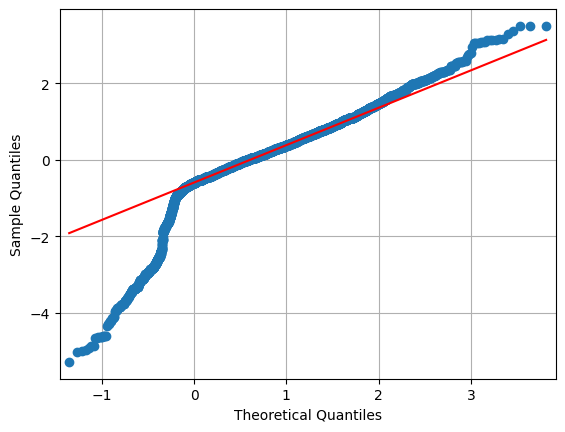

QQ Graph - positive skew normal distribution


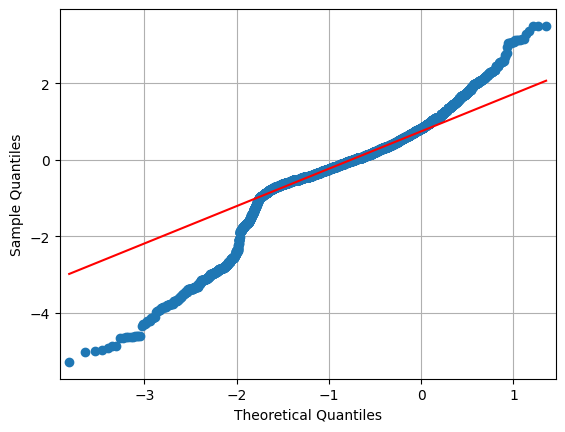

In [ ]:
fig = sm.qqplot(standarized_residuals, dist=skewnorm(2), line='q')

print('QQ Graph - positive skew normal distribution')
plt.y_label=('Standarized residuals quantiles')
plt.grid()
plt.show()

fig = sm.qqplot(standarized_residuals, dist=skewnorm(-2), line='q')

print('QQ Graph - positive skew normal distribution')
plt.y_label=('Standarized residuals quantiles')
plt.grid()
plt.show()

Distribution graph


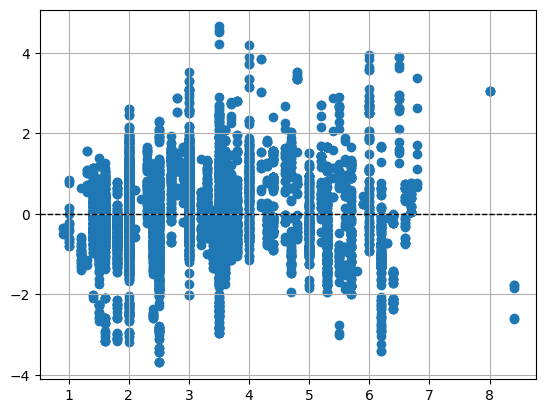



QQ Graph - normal distribution


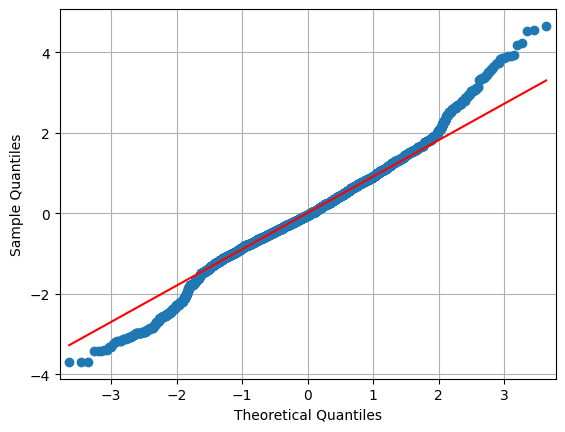

In [ ]:
X = sm.add_constant(df['Engine Size(L)'])
model = sm.OLS(y,X)
result = model.fit()

influence = result.get_influence()
standarized_residuals = influence.resid_studentized_internal

plt.scatter(X.iloc[:,1],standarized_residuals)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
print('Distribution graph')
plt.grid()
plt.show()

print("\n")
fig = sm.qqplot(standarized_residuals, dist=norm, line='q')

print('QQ Graph - normal distribution')
plt.y_label=('Standarized residuals quantiles')
plt.grid()
plt.show()

QQ Graph - positive skew normal distribution


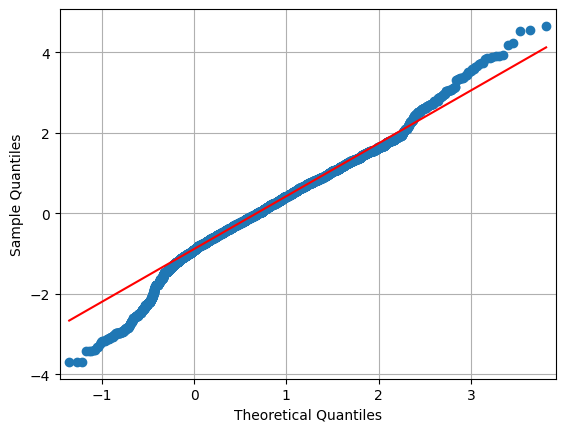

QQ Graph - positive skew normal distribution


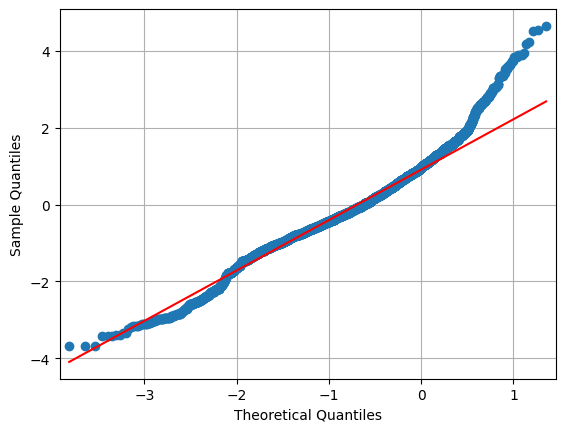

In [ ]:
fig = sm.qqplot(standarized_residuals, dist=skewnorm(2), line='q')

print('QQ Graph - positive skew normal distribution')
plt.y_label=('Standarized residuals quantiles')
plt.grid()
plt.show()

fig = sm.qqplot(standarized_residuals, dist=skewnorm(-2), line='q')

print('QQ Graph - positive skew normal distribution')
plt.y_label=('Standarized residuals quantiles')
plt.grid()
plt.show()

Distribution graph


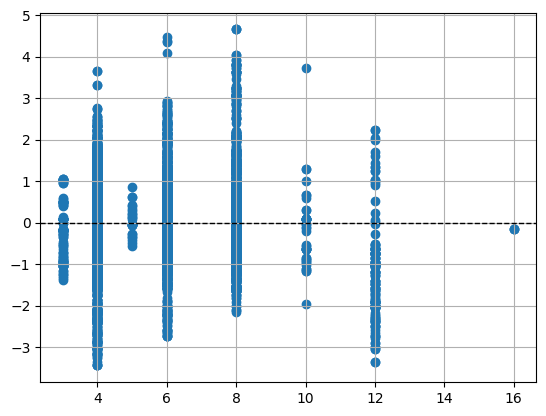



QQ Graph - normal distribution


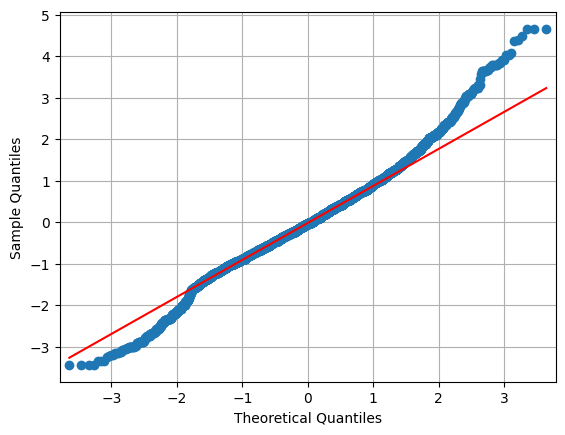

In [ ]:
X = sm.add_constant(df['Cylinders'])
model = sm.OLS(y,X)
result = model.fit()

influence = result.get_influence()
standarized_residuals = influence.resid_studentized_internal

plt.scatter(X.iloc[:,1],standarized_residuals)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
print('Distribution graph')
plt.grid()
plt.show()

print("\n")
fig = sm.qqplot(standarized_residuals, dist=norm, line='q')

print('QQ Graph - normal distribution')
plt.y_label=('Standarized residuals quantiles')
plt.grid()
plt.show()

QQ Graph - positive skew normal distribution


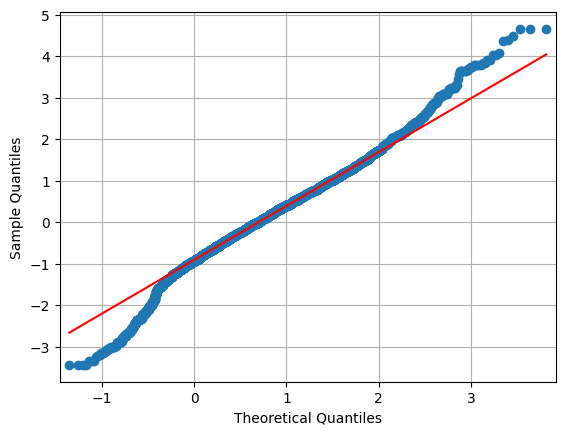

QQ Graph - positive skew normal distribution


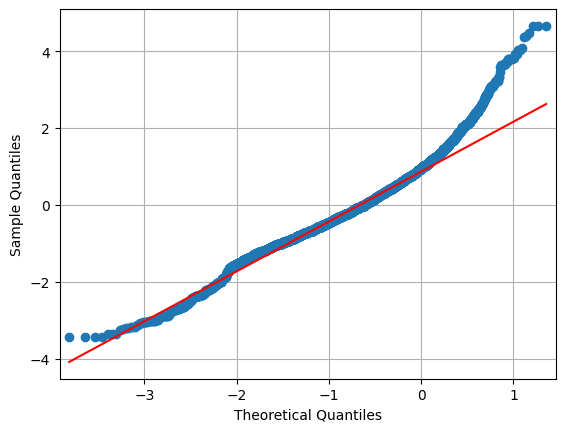

In [ ]:
fig = sm.qqplot(standarized_residuals, dist=skewnorm(2), line='q')

print('QQ Graph - positive skew normal distribution')
plt.y_label=('Standarized residuals quantiles')
plt.grid()
plt.show()

fig = sm.qqplot(standarized_residuals, dist=skewnorm(-2), line='q')

print('QQ Graph - positive skew normal distribution')
plt.y_label=('Standarized residuals quantiles')
plt.grid()
plt.show()

In [ ]:
# r = result0.rsquared

# r_log = np.log10(1+r)

# plt.hist(r_log, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
# plt.title("Log - Transformed data")
# plt.grid()
# plt.show()

<h2> Información de los modelos

In [ ]:
print("\nEngine Size(L)")
print(result0.summary())
print("\nCylinders")
print(result1.summary())
print("\nFuel Consumption Hwy (L/100 km)")
print(result2.summary())
print("\nFuel Consumption Comb (mpg)")
print(result3.summary())
print("\nFuel Consumption City (L/100 km)")
print(result4.summary())
print("\nFuel Consumption Comb (L/100 km)")
print(result5.summary())


Engine Size(L)
                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.724
Model:                             OLS   Adj. R-squared:                  0.724
Method:                  Least Squares   F-statistic:                 1.941e+04
Date:                 Fri, 29 Sep 2023   Prob (F-statistic):               0.00
Time:                         22:48:39   Log-Likelihood:                -35770.
No. Observations:                 7385   AIC:                         7.154e+04
Df Residuals:                     7383   BIC:                         7.156e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            1

<h2>Evaluación con más de una variable independiente

In [ ]:
Y = df['CO2 Emissions(g/km)']
X = df.loc[:, ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)']]

X = sm.add_constant(X)

Modelo

In [ ]:
model = sm.OLS(Y,X)
results = model.fit()

In [ ]:
print(results.params)
print('\nr^2 =',results.rsquared)

const                               227.777330
Engine Size(L)                        4.984745
Cylinders                             7.528927
Fuel Consumption City (L/100 km)     -5.336445
Fuel Consumption Comb (L/100 km)     11.456620
Fuel Consumption Comb (mpg)          -3.418640
dtype: float64

r^2 = 0.9038551538200387


In [ ]:
print(results.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.904
Model:                             OLS   Adj. R-squared:                  0.904
Method:                  Least Squares   F-statistic:                 1.387e+04
Date:                 Sat, 30 Sep 2023   Prob (F-statistic):               0.00
Time:                         00:00:21   Log-Likelihood:                -31882.
No. Observations:                 7385   AIC:                         6.378e+04
Df Residuals:                     7379   BIC:                         6.382e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

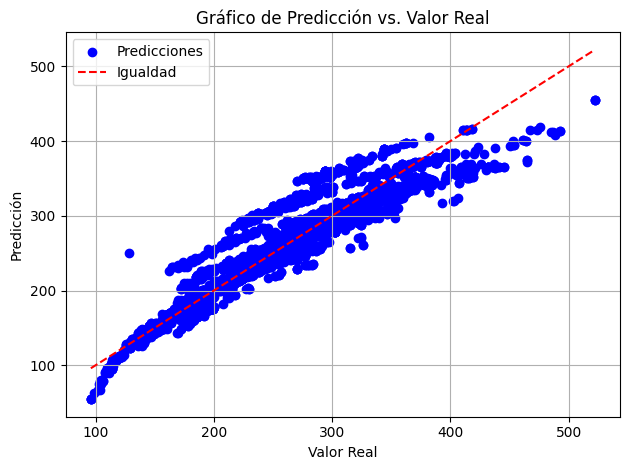

In [ ]:
plt.scatter(Y, results.predict(), color='blue', label='Predicciones')
plt.plot([min(Y), max(Y)], [min(Y), max(Y)], linestyle='--', color='red', label='Igualdad')

plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Gráfico de Predicción vs. Valor Real')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

QQ Graph - normal distribution


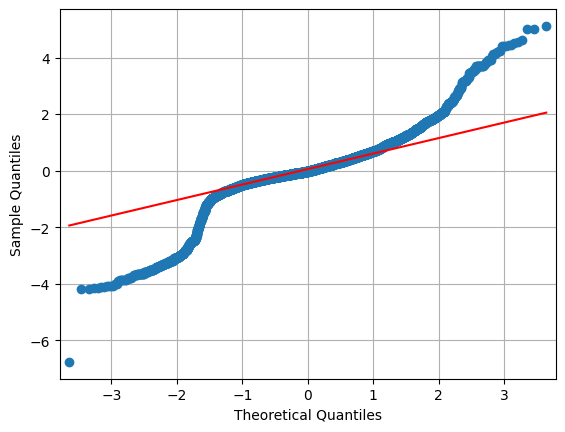

In [ ]:
influence = results.get_influence()
standarized_residuals = influence.resid_studentized_internal

fig = sm.qqplot(standarized_residuals, dist=norm, line='q')

print('QQ Graph - normal distribution')
plt.y_label=('Standarized residuals quantiles')
plt.grid()
plt.show()